# **RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.**

**RFM Analysis is a concept used by Data Science professionals, especially in the marketing domain for understanding and segmenting customers based on their buying behaviour.**

**Using RFM Analysis, a business can assess customers’:**

_**-recency (the date they made their last purchase)**<br/>_
_**-frequency (how often they make purchases)**<br/>_
_**-and monetary value (the amount spent on purchases)**<br/>_
**Recency, Frequency, and Monetary value of a customer are three key metrics that provide information about customer engagement, loyalty, and value to a business.**

# Step 1:
Load Libraries

In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [6]:
import os
os.getcwd()

'C:\\Users\\Gbenga AKINDEKO\\Documents\\Personal\\Python_Projects'

# Step 2:
Prepare the Dataset for RFM Analysis
We'll need the following from your dataset:

Recency: The difference between the most recent purchase date and the last purchase date for each customer.
Frequency: The number of purchases a customer has made.
Monetary Value: The total amount of money a customer has spent.

In [32]:
RMF_data = pd.read_csv("rfm_data.csv")
print(RMF_data.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


# Step 3: 
**Data Cleaning and Processing**

_**1: Checking for Duplicates**_

In [33]:
df = RMF_data.drop_duplicates()
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


_**2: Removing Empty cells and dealing with missing values**_

In [34]:
#Filling empty Values or missing values with empty cells
df = df.fillna('')
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


**3: Dropping rows with missing values**

In [35]:
#droping  a rows with missing values

df.dropna(inplace=True)
print(df)


     CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0          8814   2023-04-11             943.31          Product C   890075   
1          2188   2023-04-11             463.70          Product A   176819   
2          4608   2023-04-11              80.28          Product A   340062   
3          2559   2023-04-11             221.29          Product A   239145   
4          9482   2023-04-11             739.56          Product A   194545   
..          ...          ...                ...                ...      ...   
995        2970   2023-06-10             759.62          Product B   275284   
996        6669   2023-06-10             941.50          Product C   987025   
997        8836   2023-06-10             545.36          Product C   512842   
998        1440   2023-06-10             729.94          Product B   559753   
999        4759   2023-06-10             804.28          Product D   467544   

     Location  
0       Tokyo  
1      London  
2  

In [36]:
df.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [37]:
# Convert PurchaseDate to datetime
import datetime as dt
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [38]:
df.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
dtype: object

# Step 3:
**Calculate RMF**

In [39]:
# Calculate Recency
df['Recency'] = (dt.datetime.now().date() - df['PurchaseDate'].dt.date).apply(lambda x: x.days)

# Display the updated DataFrame
print(df)

     CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0          8814   2023-04-11             943.31          Product C   890075   
1          2188   2023-04-11             463.70          Product A   176819   
2          4608   2023-04-11              80.28          Product A   340062   
3          2559   2023-04-11             221.29          Product A   239145   
4          9482   2023-04-11             739.56          Product A   194545   
..          ...          ...                ...                ...      ...   
995        2970   2023-06-10             759.62          Product B   275284   
996        6669   2023-06-10             941.50          Product C   987025   
997        8836   2023-06-10             545.36          Product C   512842   
998        1440   2023-06-10             729.94          Product B   559753   
999        4759   2023-06-10             804.28          Product D   467544   

     Location  Recency  
0       Tokyo      553  
1

In [40]:
# Calculate Frequency
frequency_df = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_df.rename(columns={'OrderID': 'Frequency'}, inplace=True)
df = df.merge(frequency_df, on='CustomerID', how='left')

In [41]:
# Calculate Monetary Value
monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
df = df.merge(monetary_df, on='CustomerID', how='left')

**To calculate recency, we subtracted the purchase date from the current date and extracted the number of days using the datetime.now().date() function. It gives us the number of days since the customer’s last purchase, representing their recency value.**

# Step 4: Calculating RFM Scores
**Now let’s calculate the recency, frequency, and monetary scores:**

In [42]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)

We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase. It means that customers who have purchased more recently will receive higher recency scores.

We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. Customers who made more frequent purchases will receive higher frequency scores.

To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

To calculate RFM scores, we used the pd.cut() function to divide recency, frequency, and monetary values into bins. We define 5 bins for each value and assign the corresponding scores to each bin.

In [43]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

# Step 5: RFM Value Segmentation
**Now let’s calculate the final RFM score and the value segment according to the score**

In [44]:
# Calculate RFM score by combining the individual scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

To calculate the RFM score, we add the scores obtained for recency, frequency and monetary value. For example, if a customer has a recency score of 3, a frequency score of 4, and a monetary score of 5, their RFM score will be 12.

After calculating the RFM scores, we created RFM segments based on the scores. We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”. Segmentation is done using the pd.qcut() function, which evenly distributes scores between segments.

Now let’s have a look at the resulting data:

In [45]:
print(df.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  Recency  Frequency  MonetaryValue  RecencyScore  FrequencyScore  \
0     Tokyo      553          1         943.31             1               1   
1    London      553          1         463.70             1               1   
2  New York      553          1          80.28             1               1   
3    London      553          1         221.29             1               1   
4     Paris      553          1         739.56             1               1   

   MonetaryScore  RFM_Score Value Segment  
0           

**Now let’s have a look at the segment distribution**

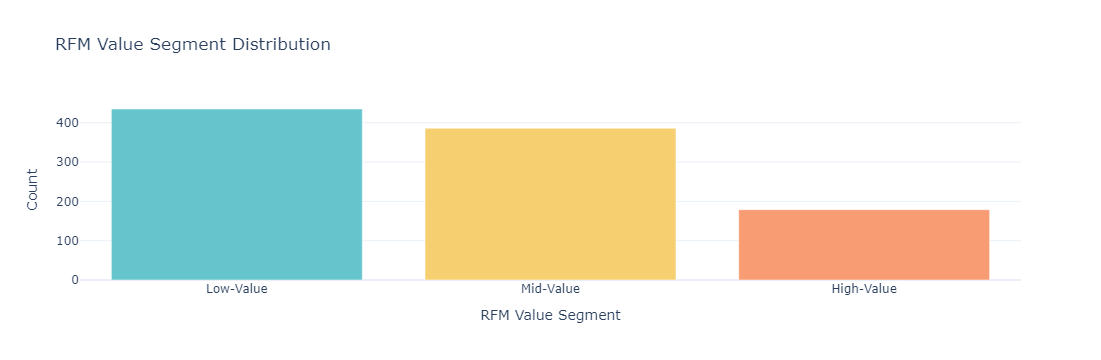

In [46]:
# RFM Segment Distribution
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

RFM Customer Segments
The above segments that we calculated are RFM value segments. Now we’ll calculate RFM customer segments. The RFM value segment represents the categorization of customers based on their RFM scores into groups such as “low value”, “medium value”, and “high value”. These segments are determined by dividing RFM scores into distinct ranges or groups, allowing for a more granular analysis of overall customer RFM characteristics. The RFM value segment helps us understand the relative value of customers in terms of recency, frequency, and monetary aspects.

Now let’s create and analyze RFM Customer Segments that are broader classifications based on the RFM scores. These segments, such as “Champions”, “Potential Loyalists”, and “Can’t Lose” provide a more strategic perspective on customer behaviour and characteristics in terms of recency, frequency, and monetary aspects. Here’s how to create the RFM customer segments

In [47]:
# Create a new column for RFM Customer Segments
df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(df[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


In the above code, we are assigning RFM segments to customers based on their RFM scores and then creating a new column called “RFM Customer Segments” in the data.

# Step 6: RFM Analysis
**Now let’s analyze the distribution of customers across different RFM customer segments within each value segment**

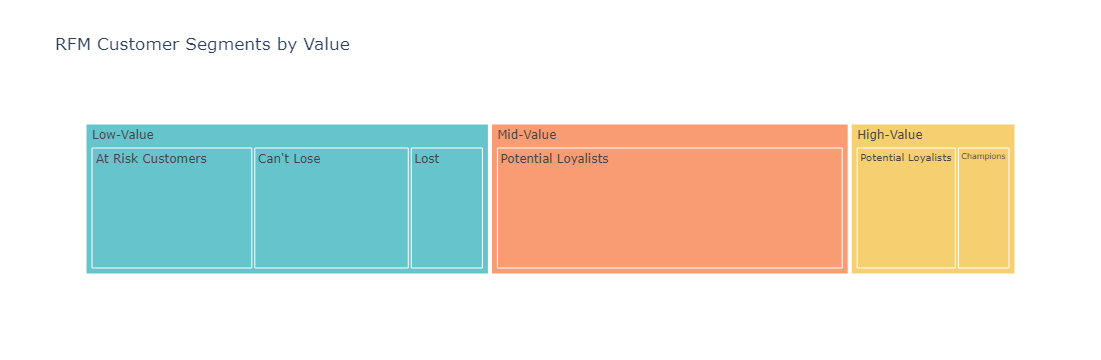

In [48]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

**Analyzing the distribution of RFM values within the Champions segment**

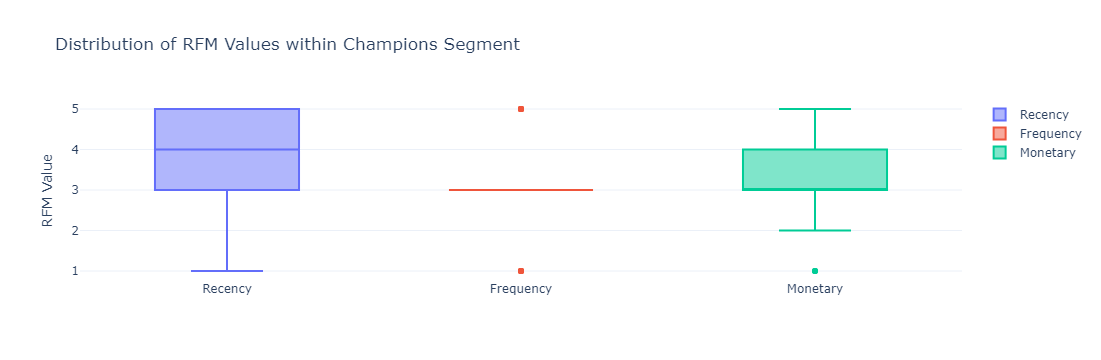

In [49]:
# Filter the data to include only the customers in the Champions segment
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

**Analyzing the correlation of the recency, frequency, and monetary scores within the champions segment**

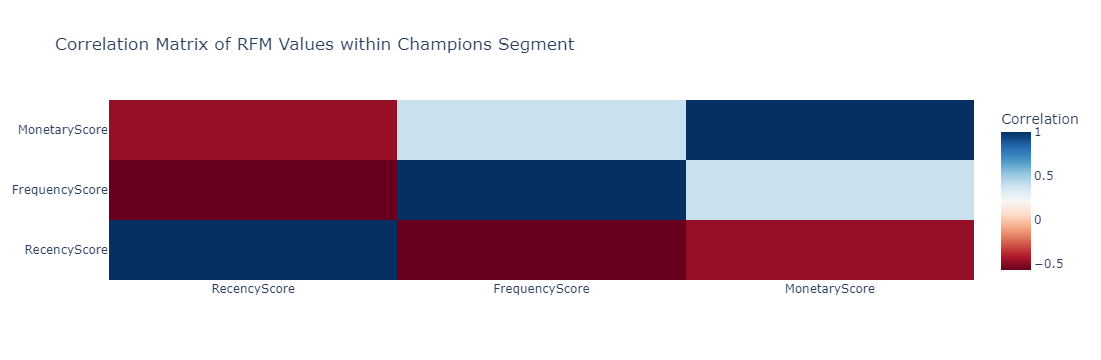

In [50]:
import plotly.graph_objects as go

# Compute the correlation matrix
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                       z=correlation_matrix.values,
                       x=correlation_matrix.columns,
                       y=correlation_matrix.columns,
                       colorscale='RdBu',
                       colorbar=dict(title='Correlation')))

# Update the layout of the heatmap
fig_heatmap.update_layout(
    title='Correlation Matrix of RFM Values within Champions Segment',
    xaxis_nticks=36
)

# Display the heatmap
fig_heatmap.show()


**number of customers in all the segments**

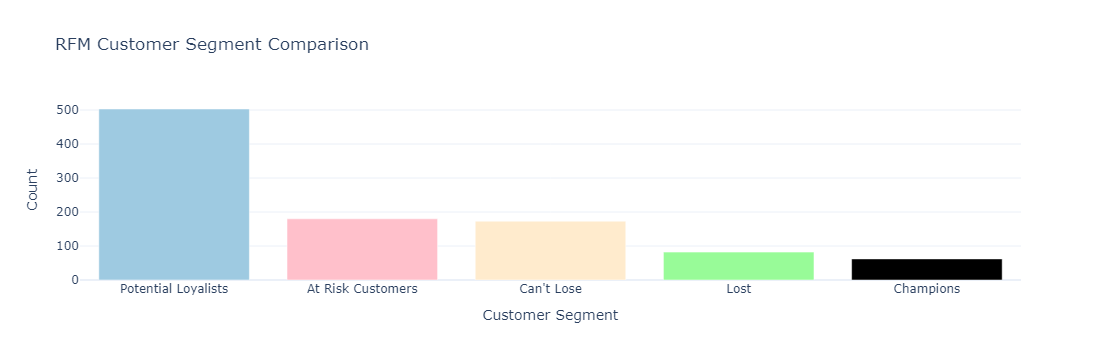

In [51]:
import plotly.graph_objects as go

# Create a bar chart to compare segment counts
segment_counts = df['RFM Customer Segments'].value_counts()

# Define a list of pastel colors for the bar chart
pastel_colors = ['rgb(158,202,225)', 'rgb(255,192,203)', 'rgb(255,235,205)', 'rgb(152,251,152)']

# Corrected code: Use 'data' instead of 'df' for the Figure argument
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                             marker=dict(color=pastel_colors))])

# Set the color of the "Champions" segment to a different color if necessary
champions_color = 'rgb(255, 140, 0)'  # Orange color for example

# Update layout
fig.update_layout(
    title='RFM Customer Segment Comparison',
    xaxis_title='Customer Segment',
    yaxis_title='Count',
    showlegend=False
)

# Display the chart
fig.show()


**The recency, frequency, and monetary scores of all the segments**

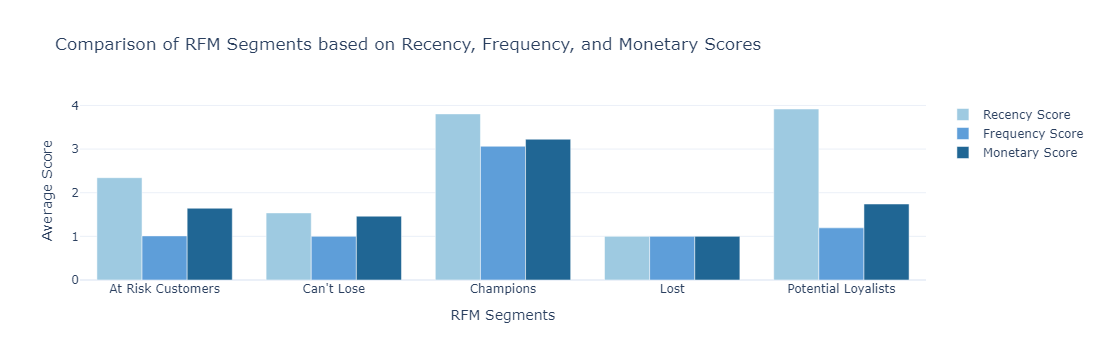

In [52]:
import pandas as pd
import plotly.graph_objects as go

# Select only the numeric columns for Recency, Frequency, and Monetary scores
numeric_cols = ['RecencyScore', 'FrequencyScore', 'MonetaryScore']

# Calculate the average Recency, Frequency, and Monetary scores for each segment
# Only keep the numeric columns to avoid aggregation errors
segment_scores = df.groupby('RFM Customer Segments')[numeric_cols].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'  # Light blue
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'  # Medium blue
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'  # Dark blue
))

# Update layout for better visualization
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Average Score',
    barmode='group',
    showlegend=True,
    template='plotly_white'  # Using a clean white template
)

# Show the figure
fig.show()


# Step 7: Creating Dashboard

In [61]:
pip install dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.io as pio
import plotly.colors as pc

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout using Bootstrap components
app.layout = html.Div([
    html.H1("RFM Analysis Dashboard", className="text-center mb-4"),
    html.Div("Analyze customer segments based on RFM scores.", className="text-center mb-4"),
    
    # Dropdown for selecting the chart
    dcc.Dropdown(
        id='chart-type-dropdown',
        options=[
            {'label': 'RFM Value Segment Distribution', 'value': 'segment_distribution'},
            {'label': 'Distribution of RFM Values within Customer Segment', 'value': 'RFM_distribution'},
            {'label': 'Correlation Matrix of RFM Values within Champions Segment', 'value': 'correlation_matrix'},
            {'label': 'Comparison of RFM Segments', 'value': 'segment_comparison'},
            {'label': 'Comparison of RFM Segments based on Scores', 'value': 'segment_scores'},
        ],
        value='segment_distribution',  # Default selection
        className="mb-4",
    ),
    
    # Graph container
    dcc.Graph(id='rfm-chart', className="mb-4"),
])

# Define callback to update the selected chart
@app.callback(
    Output('rfm-chart', 'figure'),
    [Input('chart-type-dropdown', 'value')]
)
def update_chart(selected_chart_type):
    if selected_chart_type == 'segment_distribution':
        return fig_segment_dist
    elif selected_chart_type == 'RFM_distribution':
        return fig_treemap_segment_product
    elif selected_chart_type == 'correlation_matrix':
        return fig_corr_heatmap
    elif selected_chart_type == 'segment_comparison':
        return comparison_fig
    elif selected_chart_type == 'segment_scores':
        return fig
    
    # Return a default chart if no valid selection
    return fig_segment_dist

if __name__ == '__main__':
    app.run_server(port=8052)